In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.maf import radar, norm_df

In [2]:
df = pd.read_pickle('2.0combined_stats.pkl')

new_index = [name.replace('_10yrs', '') for name in df.index]
df.index=new_index


df21 = pd.read_pickle('2.1combined_stats.pkl')
new_index = [name.replace('_10yrs', '') for name in df21.index]
df21.index=new_index


In [3]:
df = pd.concat([df,df21])

In [4]:
[name for name in df.columns if 'Brown' in name]

['VolumeSum Brown Dwarf, L7  HealpixSlicer',
 'VolumeSum Brown Dwarf, L4  HealpixSlicer']

In [5]:
name_dict = {'best18k parallax  HealpixSlicer': 'parallax',
            'best18k properMotion  HealpixSlicer': 'proper motion',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 5_10 days UserPointsSlicer': 'fast microlensing',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 60_90 days UserPointsSlicer': 'slow microlensing',
            'fONv MedianNvis fO  HealpixSlicer': 'fO N vis',
            'DifferentialCompleteness H = 16.000000 Discovery_N_Chances NEO 3 pairs in 15 nights trailing loss MoObjSlicer': 'NEO bright',
            'DifferentialCompleteness H = 22.000000 Discovery_N_Chances NEO 3 pairs in 15 nights trailing loss MoObjSlicer': 'NEO faint',
            'DifferentialCompleteness H = 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights trailing loss MoObjSlicer': 'TNO',
             'Total detected SNNSNMetric_nSN  HealpixSlicer': 'SNe',
            #'Total detected TDE_Quality__some_color_pnum  UserPointsSlicer': 'TDE',
            '3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer': '3x2',
            'Median WeakLensingNvisits i band non-DD HealpixSlicer': 'WL',
            'Sum PrestoKNe__scoreS  UserPointsSlicer': 'Transients, KNe',
            'Total detected XRBPopMetric__early_detect  UserPointsSlicer': 'XRB',
            'VolumeSum Brown Dwarf, L7  HealpixSlicer': 'Brown Dwarf Vol',}
invert_cols = ['parallax', 'proper motion']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = df[key]

mag_name_dict = {}
for filtername in 'ugrizy':
    mag_name_dict['Median CoaddM5 %s HealpixSlicer' % filtername] = filtername

mag_data = pd.DataFrame()
for key in mag_name_dict:
    mag_data[mag_name_dict[key]] = df[key]

In [6]:
df

metric,Length of Survey (days),"NChanges filter, observationStartMJD",OpenShutterFraction,tEff,Number of Exposures,Sum SkySaturation,Slew Count All visits,Mean slewTime All visits,Median slewTime All visits,Min slewTime All visits,...,Rms AGN SF_uncert i band HealpixSlicer,Median AGN SF_uncert i band HealpixSlicer,Max AGN SF_uncert i band HealpixSlicer,Min AGN SF_uncert i band HealpixSlicer,N(+3Sigma) AGN SF_uncert i band HealpixSlicer,N(-3Sigma) AGN SF_uncert i band HealpixSlicer,AGN SF_uncert i band HealpixSlicer,25th%ile AGN SF_uncert i band HealpixSlicer,75th%ile AGN SF_uncert i band HealpixSlicer,AreaThreshold AGN SF_uncert i band HealpixSlicer
baseline_retrofoot_v2.0,3652.104322,34678.0,0.722316,0.588588,2086534.0,0.0,2086534.0,7.728750,4.832924,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
baseline_v2.0,3652.104333,34812.0,0.722458,0.569799,2086980.0,0.0,2086980.0,7.718367,4.824469,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bluer_indx0_v2.0,3652.104250,34488.0,0.722881,0.568914,2088051.0,0.0,2088051.0,7.692650,4.824003,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bluer_indx1_v2.0,3652.104303,34491.0,0.723220,0.571559,2089107.0,0.0,2089107.0,7.697270,4.824258,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carina_v2.0,3652.104419,30852.0,0.722543,0.565177,2087222.0,0.0,2087222.0,7.714250,4.832211,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
shave_30_v2.1,3652.104404,34583.0,0.720445,0.572340,2081086.0,0.0,2081086.0,7.836182,4.854378,2.0,...,0.028433,0.039025,0.332841,0.017187,587.0,0.0,28524.0,0.032634,0.051799,12649.833821
shave_32_v2.1,3652.104099,34422.0,0.731140,0.619169,1980338.0,0.0,1980338.0,7.959730,4.860321,2.0,...,0.029379,0.037020,0.357527,0.016374,619.0,0.0,28598.0,0.031192,0.050222,14075.793724
shave_35_v2.1,3652.104120,33757.0,0.745818,0.689291,1847269.0,0.0,1847269.0,8.119140,4.865657,2.0,...,0.029737,0.034809,0.394451,0.014906,599.0,0.0,28867.0,0.028845,0.049014,15209.679439
shave_38_v2.1,3652.103906,33798.0,0.758122,0.760152,1729706.0,0.0,1729706.0,8.312322,4.871659,2.0,...,0.030894,0.033063,0.409284,0.013002,640.0,0.0,28911.0,0.027023,0.045868,16388.047716


In [7]:
df.columns[1000]

'CumulativeCompleteness@Time@H=18.00 H <=18.0 @ 61373.83 Discovery_Time Trojan 3 pairs in 15 nights detection loss MoObjSlicer'

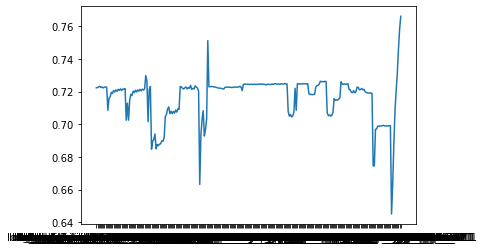

In [8]:
plt.plot(df['OpenShutterFraction'])

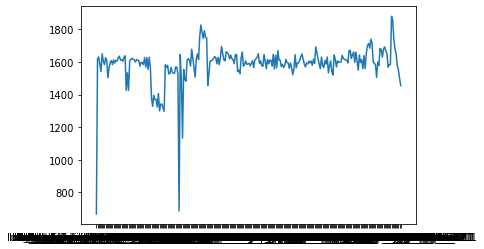

In [9]:
plt.plot(data['XRB'])

In [10]:
df['OpenShutterFraction'].values.max()

0.7661039790105743

In [11]:
[ack for ack in df.columns if 'SNN' in ack]

['Median SNNSNMetric_nSN  HealpixSlicer',
 'Mean SNNSNMetric_nSN  HealpixSlicer',
 'Total detected SNNSNMetric_nSN  HealpixSlicer',
 'Total on sky SNNSNMetric_nSN  HealpixSlicer',
 'Median SNNSNMetric_zlim  HealpixSlicer',
 'Mean SNNSNMetric_zlim  HealpixSlicer',
 'Total detected SNNSNMetric_zlim  HealpixSlicer',
 'Total on sky SNNSNMetric_zlim  HealpixSlicer']

In [12]:
runs = [run for run in df.index if 'baseline' in run]

Text(0, 0.5, 'N SNe')

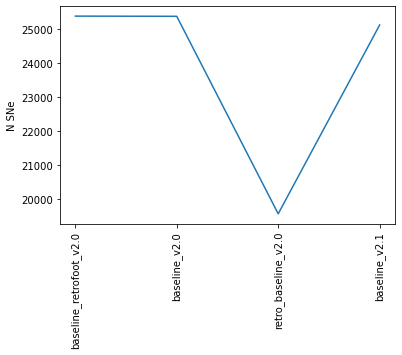

In [13]:
# Turning on rolling gives a big boost in SNe
fig, ax = plt.subplots()
ax.plot(df['Total detected SNNSNMetric_nSN  HealpixSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('N SNe')

In [14]:

ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.1')


In [15]:
ndata

,parallax,proper motion,fast microlensing,slow microlensing,fO N vis,NEO bright,NEO faint,TNO,SNe,3x2,WL,"Transients, KNe",XRB,Brown Dwarf Vol
baseline_retrofoot_v2.0,1.045973,1.066295,0.307492,0.478664,1.044153,0.996127,0.972050,0.964537,1.010359,0.881514,1.032086,1.065868,0.402167,1.052634
baseline_v2.0,1.020038,1.022650,1.029316,0.993506,1.001193,1.000215,0.980331,0.990523,1.010139,0.983091,0.994652,1.071856,0.975316,1.026072
retro_baseline_v2.0,1.003210,1.065402,0.250814,0.355519,1.011933,0.978270,0.983437,0.972791,0.778765,0.897971,0.994652,0.934132,0.413606,1.096607
baseline_v2.1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


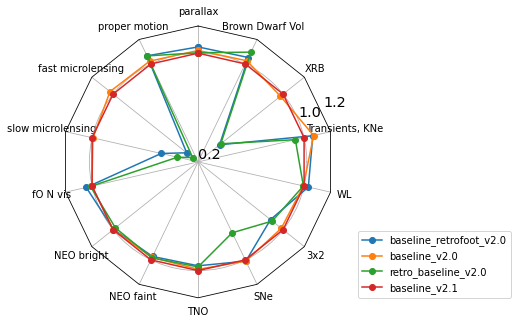

In [16]:


fig, ax = radar(ndata, legend=True, rgrids=[0.2, 1.0, 1.2], bbox_to_anchor=(1.65, 0))
fig.savefig('baseline2_radar.pdf', bbox_inches="tight")

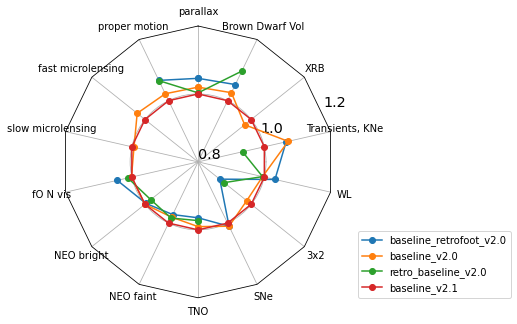

In [17]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))
fig.savefig('baseline2_radar_zoom.pdf', bbox_inches="tight")

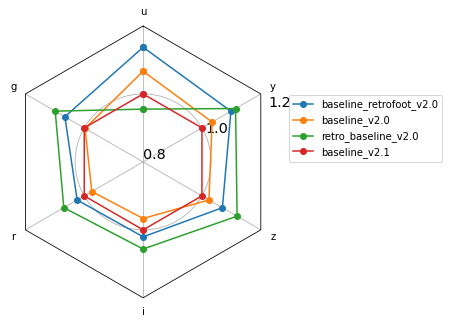

In [18]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.1',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.2])
fig.savefig('baselines_mags.pdf', bbox_inches="tight")

In [19]:
mag_data.loc[runs]

,u,g,r,i,z,y
baseline_retrofoot_v2.0,25.889514,26.802069,26.805706,26.272641,25.556130,24.826652
baseline_v2.0,25.818916,26.733479,26.755971,26.218659,25.510379,24.762720
retro_baseline_v2.0,25.707301,26.835006,26.850968,26.308518,25.606168,24.842363
baseline_v2.1,25.751969,26.736248,26.781543,26.252054,25.486640,24.728145


Text(0, 0.5, 'MBA')

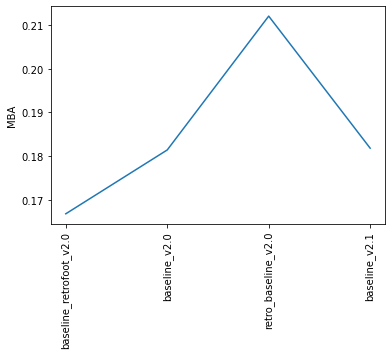

In [20]:
mba = 'DifferentialCompleteness H = 21.000000 Discovery_N_Chances MBA 3 pairs in 15 nights trailing loss MoObjSlicer'
fig, ax = plt.subplots()
ax.plot(df[mba][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('MBA')

In [21]:
df[mba][runs]

baseline_retrofoot_v2.0    0.166833
baseline_v2.0              0.181436
retro_baseline_v2.0        0.212042
baseline_v2.1              0.181836
Name: DifferentialCompleteness H = 21.000000 Discovery_N_Chances MBA 3 pairs in 15 nights trailing loss MoObjSlicer, dtype: float64

In [22]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'blue' in run]

In [23]:
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


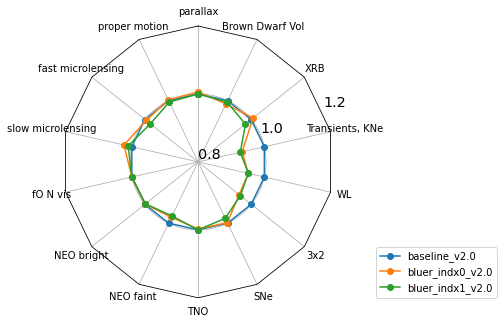

In [24]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.6, 0))
fig.savefig('bluer.pdf', bbox_inches="tight")

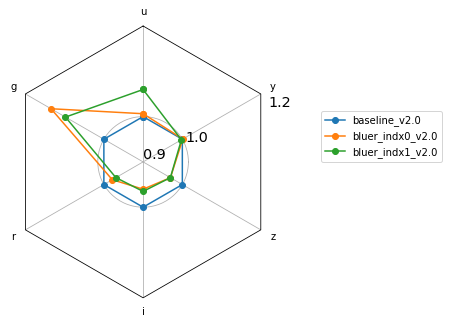

In [25]:

data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.90, 1.0, 1.2], alpha=.1)
fig.savefig('bluer_mags.pdf', bbox_inches="tight")

In [26]:
low_dust_ratios={"u": 0.32, "g": 0.4, "r": 1.0, "i": 1.0, "z": 0.9, "y": 0.9}
filter_b_list = [low_dust_ratios,{'u': 0.07, 'g': 0.12, 'r': 0.21, 'i': 0.21, 'z': 0.19, 'y': 0.20},
                     {'u': 0.08, 'g': 0.11, 'r': 0.21, 'i': 0.21, 'z': 0.19, 'y': 0.20}]


filter_b_list

[{'u': 0.32, 'g': 0.4, 'r': 1.0, 'i': 1.0, 'z': 0.9, 'y': 0.9},
 {'u': 0.07, 'g': 0.12, 'r': 0.21, 'i': 0.21, 'z': 0.19, 'y': 0.2},
 {'u': 0.08, 'g': 0.11, 'r': 0.21, 'i': 0.21, 'z': 0.19, 'y': 0.2}]

In [27]:
blue_frame = pd.DataFrame(filter_b_list, index=['baseline_v2.0', 'bluer_indx0_v2.0', 'bluer_indx1_v2.0'])

norm_col = blue_frame['r'].values + 0

for col in blue_frame.columns:
    blue_frame[col] = blue_frame[col]/norm_col * 10


print(blue_frame.to_latex(float_format='%.1f'))

\begin{tabular}{lrrrrrr}
\toprule
{} &   u &   g &    r &    i &   z &   y \\
\midrule
baseline\_v2.0    & 3.2 & 4.0 & 10.0 & 10.0 & 9.0 & 9.0 \\
bluer\_indx0\_v2.0 & 3.3 & 5.7 & 10.0 & 10.0 & 9.0 & 9.5 \\
bluer\_indx1\_v2.0 & 3.8 & 5.2 & 10.0 & 10.0 & 9.0 & 9.5 \\
\bottomrule
\end{tabular}



In [28]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'long_u' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


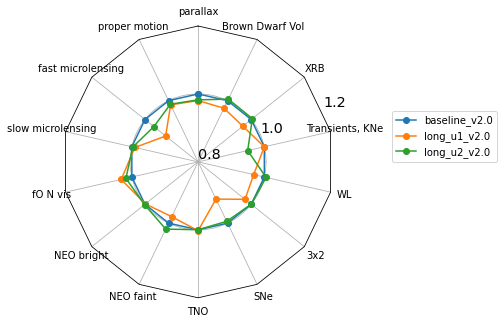

In [29]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2])
fig.savefig('long_u.pdf', bbox_inches="tight")

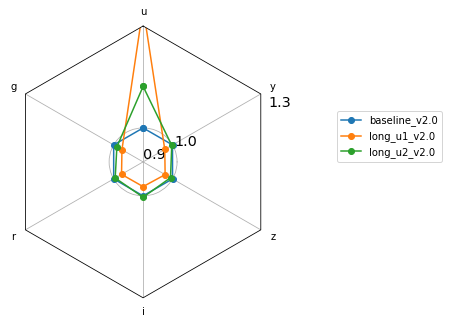

In [30]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.90, 1.0, 1.3], alpha=.1)
fig.savefig('long_u_mags.pdf', bbox_inches="tight")

In [31]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'rolling_ns' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


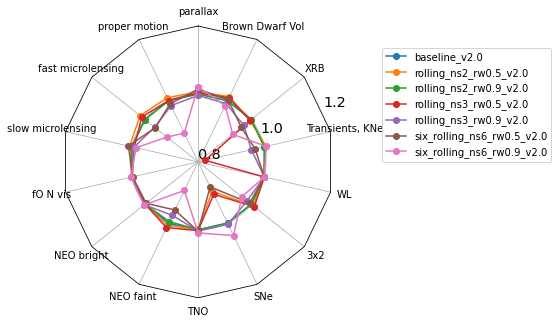

In [32]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2],  bbox_to_anchor=(1.8, .5))
fig.savefig('rolling_ns.pdf', bbox_inches="tight")

In [33]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'roll_' in run and 'ddf' not in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


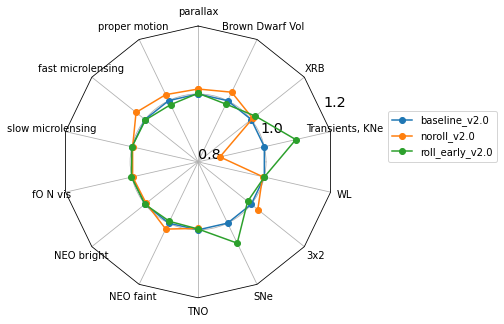

In [34]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2])
fig.savefig('rolling_more.pdf', bbox_inches="tight")

In [35]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'rolling_bul' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')


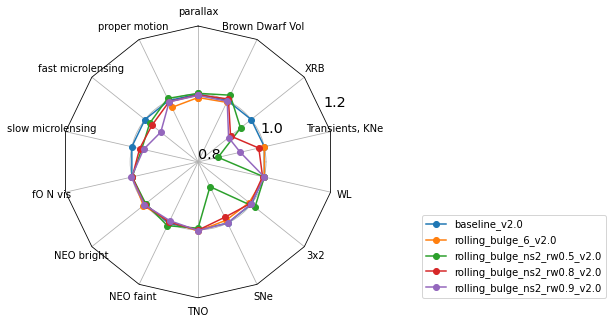

In [36]:
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('rolling_bulge.pdf', bbox_inches="tight")

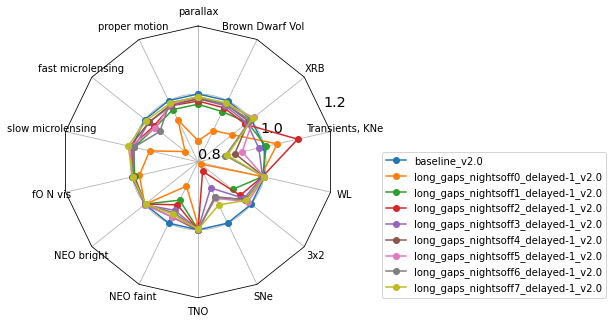

In [37]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'long_gaps_night' in run and '-1' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


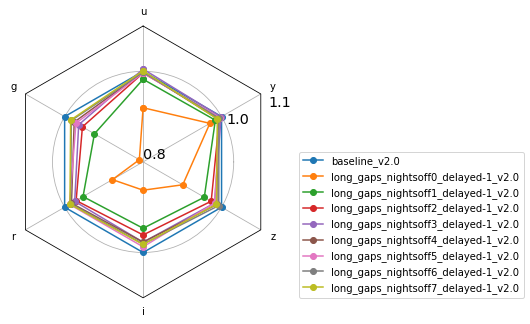

In [38]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('long_gaps_mags.pdf', bbox_inches="tight")

Text(0, 0.5, 'Transient Score')

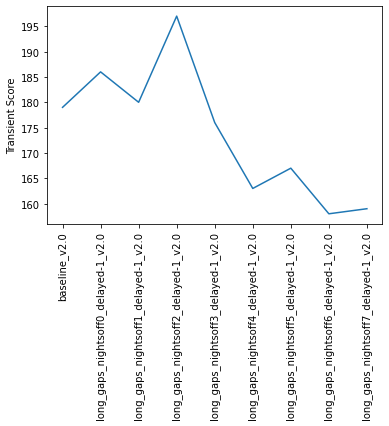

In [39]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

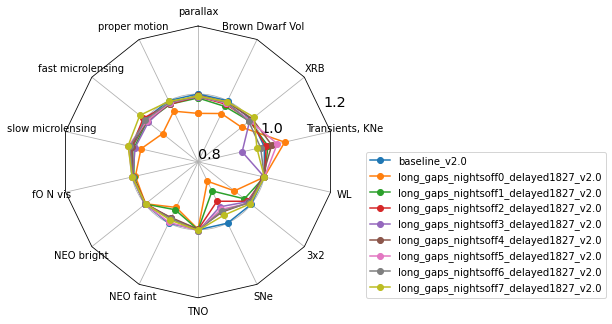

In [40]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'long_gaps_night' in run and '18' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


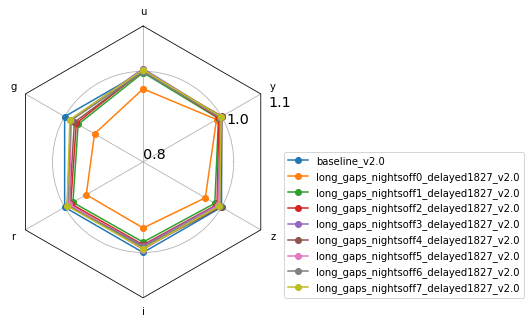

In [41]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('long_gaps_delayed_mags.pdf', bbox_inches="tight")

Text(0, 0.5, 'Transient Score')

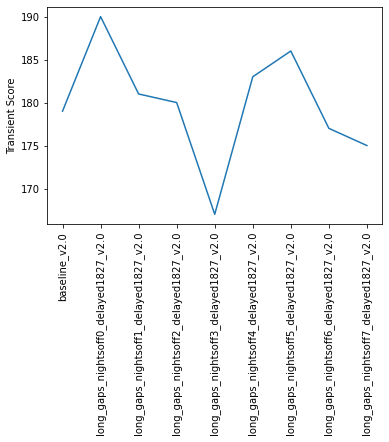

In [42]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

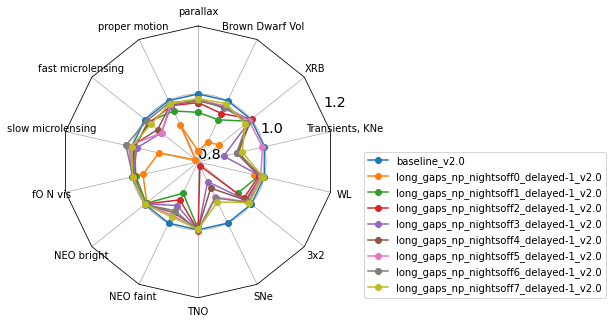

In [43]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'long_gaps_np' in run and '-1' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))


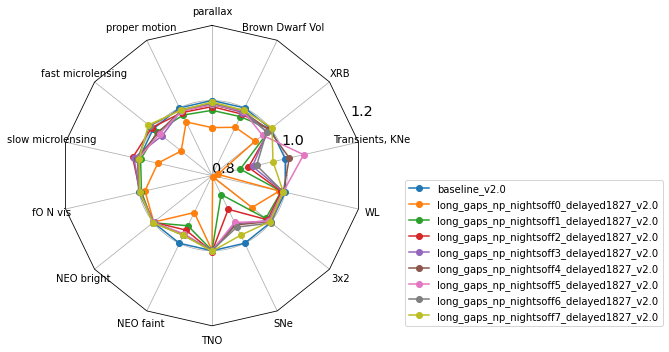

In [44]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'long_gaps_np' in run and '18' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

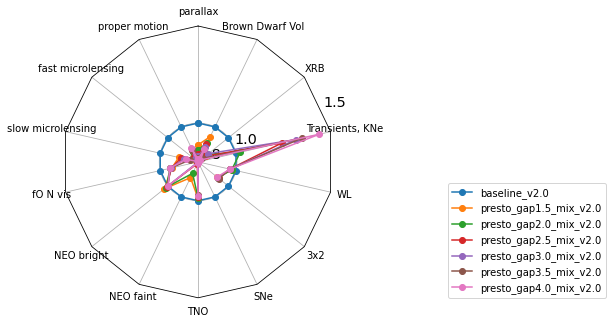

In [45]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto_gap' in run and 'mix' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.5], bbox_to_anchor=(2, 0))
fig.savefig('presto_gaps_mix.pdf', bbox_inches="tight")

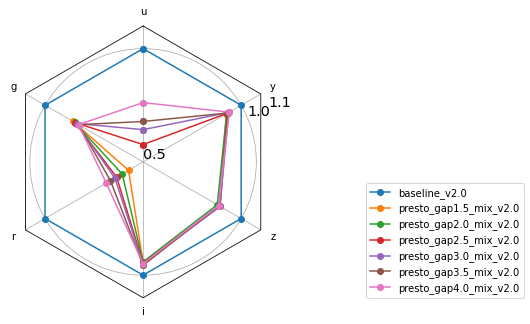

In [46]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.50, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('presto_mix_gaps_mags.pdf', bbox_inches="tight")

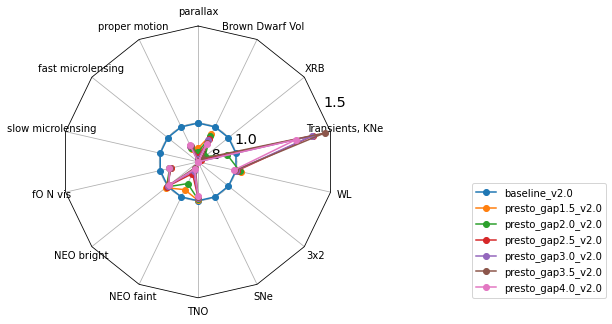

In [47]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto_gap' in run and 'mix' not in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.5], bbox_to_anchor=(2, 0))
fig.savefig('presto_gap.pdf', bbox_inches="tight")

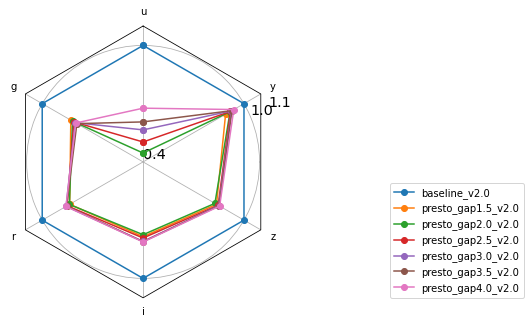

In [48]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.40, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('presto_gaps_mags.pdf', bbox_inches="tight")

Text(0, 0.5, 'Transient Score')

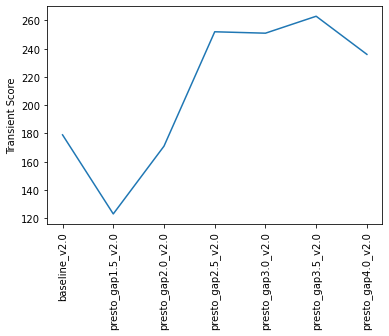

In [49]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

Text(0, 0.5, 'Transient Score')

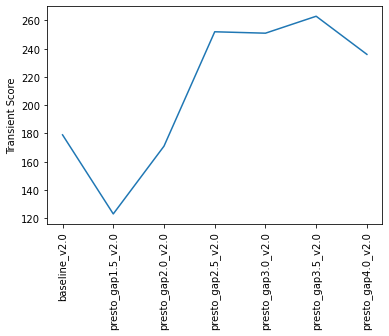

In [50]:
fig, ax = plt.subplots()
ax.plot(df['Sum PrestoKNe__scoreS  UserPointsSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Transient Score')

Text(0, 0.5, 'N SNe')

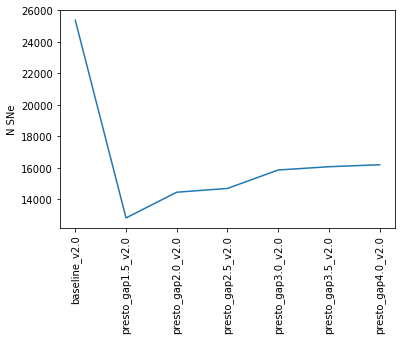

In [51]:
fig, ax = plt.subplots()
ax.plot(df['Total detected SNNSNMetric_nSN  HealpixSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('N SNe')

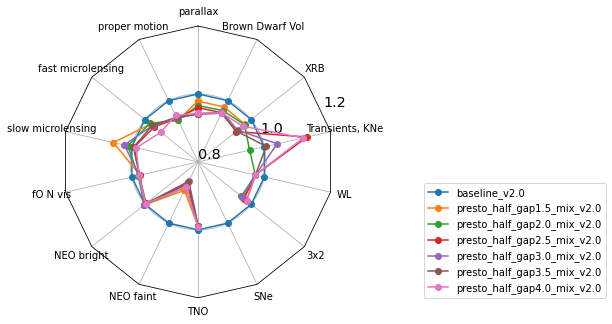

In [52]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto_half' in run and 'mix' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('presto_half_mix.pdf', bbox_inches="tight")

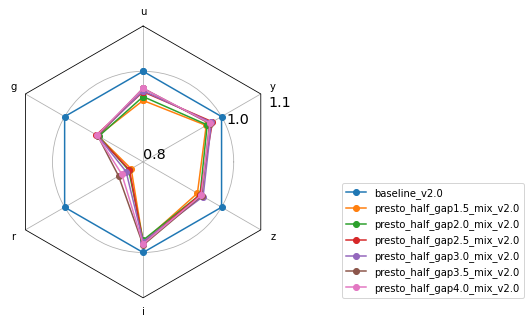

In [53]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('presto_half_mixed_mags.pdf', bbox_inches="tight")

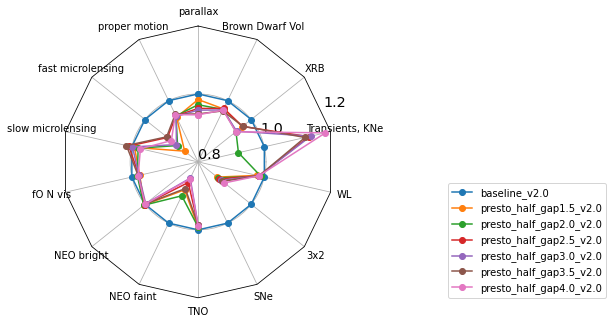

In [54]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto_half' in run and 'mix' not in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('presto_half_gaps.pdf', bbox_inches="tight")

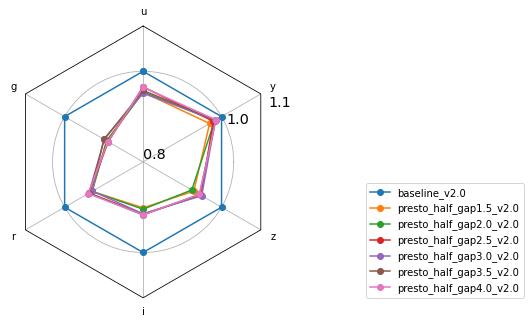

In [55]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('presto_half_mags.pdf', bbox_inches="tight")

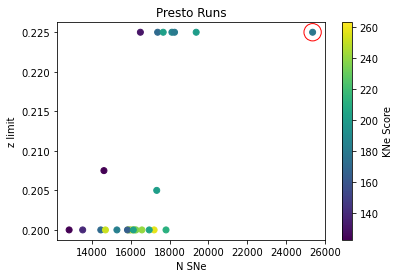

In [56]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto' in run ] 

plt.scatter(df['Total detected SNNSNMetric_nSN  HealpixSlicer'].loc[runs],
            df['Median SNNSNMetric_zlim  HealpixSlicer'].loc[runs],
           c=df['Sum PrestoKNe__scoreS  UserPointsSlicer'].loc[runs])
plt.xlabel('N SNe')
plt.ylabel('z limit')
plt.title('Presto Runs')
cb = plt.colorbar()
cb.set_label('KNe Score')

plt.scatter(df['Total detected SNNSNMetric_nSN  HealpixSlicer'].loc[runs][0],
            df['Median SNNSNMetric_zlim  HealpixSlicer'].loc[runs][0],s=300, edgecolors='red', facecolors='none')

plt.savefig('presto_sne.pdf')

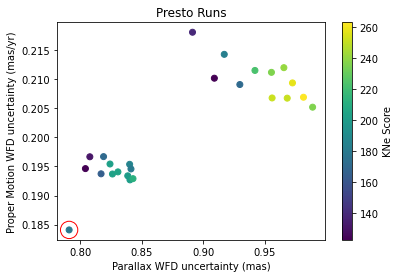

In [57]:
plt.scatter(df['best18k parallax  HealpixSlicer'].loc[runs],
            df['best18k properMotion  HealpixSlicer'].loc[runs],
           c=df['Sum PrestoKNe__scoreS  UserPointsSlicer'].loc[runs])
#plt.plot(df['best18k parallax  HealpixSlicer'].loc[runs][0],
#            df['best18k properMotion  HealpixSlicer'].loc[runs][0], marker='*', color='red')
cb = plt.colorbar()
cb.set_label('KNe Score')

plt.xlabel('Parallax WFD uncertainty (mas)')
plt.ylabel('Proper Motion WFD uncertainty (mas/yr)')
plt.title('Presto Runs')

plt.scatter(df['best18k parallax  HealpixSlicer'].loc[runs][0],
            df['best18k properMotion  HealpixSlicer'].loc[runs][0]
            ,s=300, edgecolors='red', facecolors='none')

plt.savefig('presto_astrom.pdf')

In [58]:
[col for col in df.columns if 'zlim' in col]

['Median SNNSNMetric_zlim  HealpixSlicer',
 'Mean SNNSNMetric_zlim  HealpixSlicer',
 'Total detected SNNSNMetric_zlim  HealpixSlicer',
 'Total on sky SNNSNMetric_zlim  HealpixSlicer',
 'Mean ELAISS1, SNe_zlim  HealpixSubsetSlicer',
 'Median ELAISS1, SNe_zlim  HealpixSubsetSlicer',
 'Sum ELAISS1, SNe_zlim  HealpixSubsetSlicer',
 'Mean XMM-LSS, SNe_zlim  HealpixSubsetSlicer',
 'Median XMM-LSS, SNe_zlim  HealpixSubsetSlicer',
 'Sum XMM-LSS, SNe_zlim  HealpixSubsetSlicer',
 'Mean ECDFS, SNe_zlim  HealpixSubsetSlicer',
 'Median ECDFS, SNe_zlim  HealpixSubsetSlicer',
 'Sum ECDFS, SNe_zlim  HealpixSubsetSlicer',
 'Mean COSMOS, SNe_zlim  HealpixSubsetSlicer',
 'Median COSMOS, SNe_zlim  HealpixSubsetSlicer',
 'Sum COSMOS, SNe_zlim  HealpixSubsetSlicer',
 'Mean EDFS, SNe_zlim  HealpixSubsetSlicer',
 'Median EDFS, SNe_zlim  HealpixSubsetSlicer',
 'Sum EDFS, SNe_zlim  HealpixSubsetSlicer']

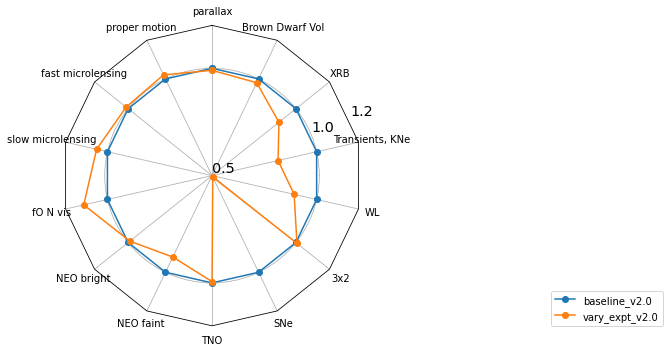

In [59]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'vary_expt' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

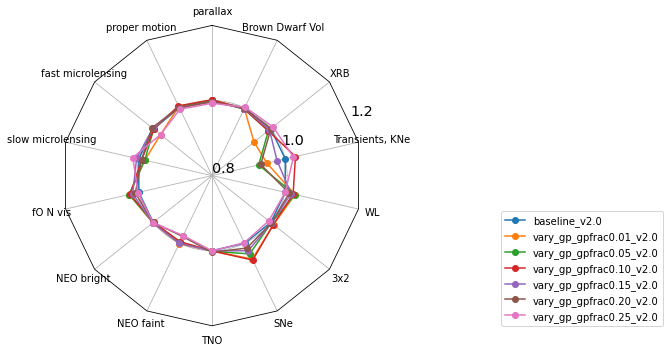

In [60]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'vary_gp' in run] 
ndata = norm_df(data, runs[0:7], cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

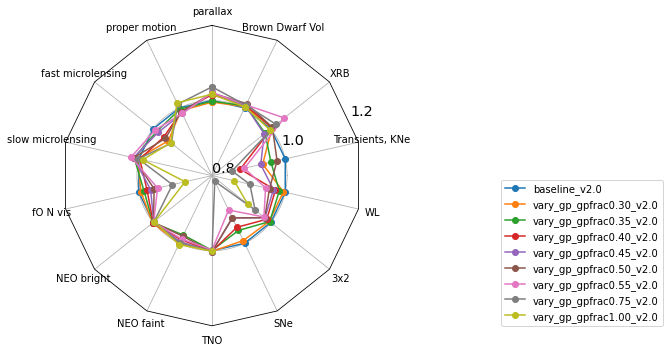

In [61]:

ndata = norm_df(data, [runs[0]] + runs[7:], cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

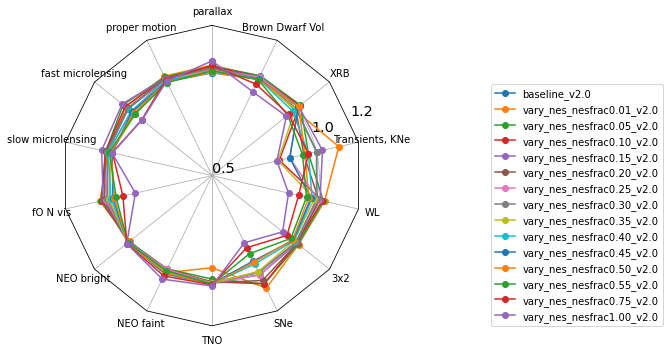

In [62]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'vary_nes' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

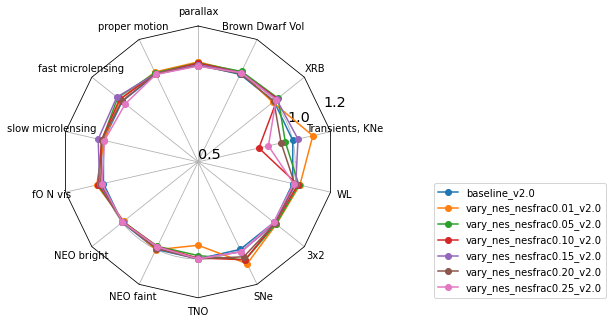

In [63]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'vary_nes' in run] 
ndata = norm_df(data, runs[0:7], cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('vary_nes1.pdf', bbox_inches="tight")

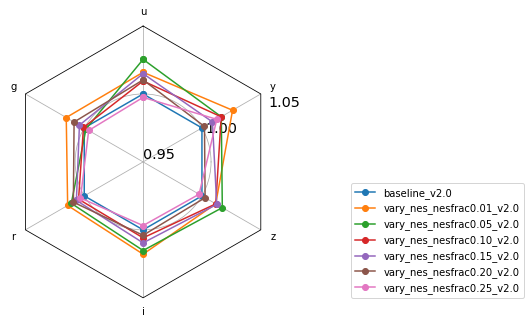

In [64]:
data_normed = norm_df(mag_data, runs[0:7], ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.95, 1.0, 1.05], bbox_to_anchor=(1.9, 0))
fig.savefig('vary_nes_mags.pdf', bbox_inches="tight")

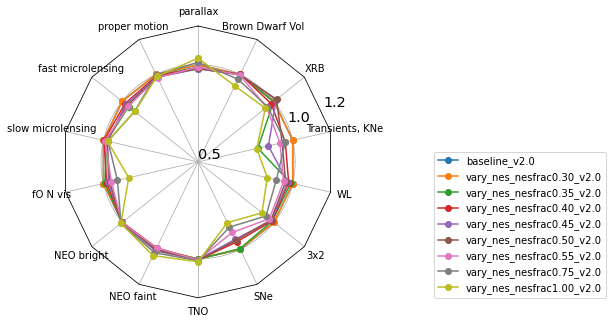

In [65]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'vary_nes' in run][6:]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('vary_nes2.pdf', bbox_inches="tight")

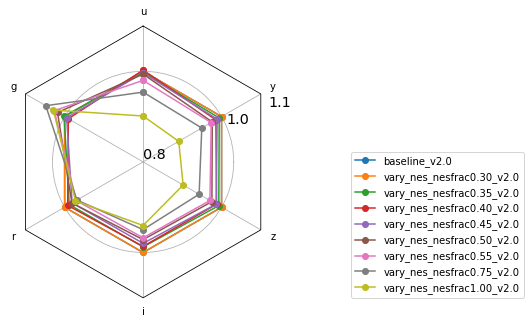

In [66]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('vary_nes_mags2.pdf', bbox_inches="tight")

In [67]:
data.loc[runs]

,parallax,proper motion,fast microlensing,slow microlensing,fO N vis,NEO bright,NEO faint,TNO,SNe,3x2,WL,"Transients, KNe",XRB,Brown Dwarf Vol
baseline_v2.0,0.791058,0.184088,0.1580,0.4284,839.0,0.9298,0.3788,0.6480,25374.969,37.908126,186.0,179.0,1620.0,168086.074111
vary_nes_nesfrac0.30_v2.0,0.791058,0.184088,0.1580,0.4284,839.0,0.9296,0.3768,0.6480,25374.969,37.908126,186.0,179.0,1620.0,168086.074111
vary_nes_nesfrac0.35_v2.0,0.800042,0.185509,0.1513,0.4215,832.0,0.9310,0.3778,0.6484,25279.688,37.482975,184.0,146.0,1615.0,167943.251895
vary_nes_nesfrac0.40_v2.0,0.803523,0.185504,0.1551,0.4270,825.0,0.9296,0.3756,0.6516,24296.872,37.440052,182.0,172.0,1590.0,168149.994470
vary_nes_nesfrac0.45_v2.0,0.808111,0.186730,0.1543,0.4188,817.0,0.9312,0.3818,0.6502,23907.965,37.260553,181.0,156.0,1644.0,167966.688529
vary_nes_nesfrac0.50_v2.0,0.806093,0.186873,0.1529,0.4209,811.0,0.9332,0.3796,0.6520,24074.956,37.147729,179.0,169.0,1647.0,167586.898217
vary_nes_nesfrac0.55_v2.0,0.799772,0.187616,0.1517,0.4244,804.0,0.9312,0.3758,0.6516,22926.121,36.765826,177.0,167.0,1541.0,167424.509859
vary_nes_nesfrac0.75_v2.0,0.780650,0.184629,0.1451,0.4181,777.0,0.9370,0.3860,0.6538,22147.688,35.891727,170.0,172.0,1550.0,163544.153522
vary_nes_nesfrac1.00_v2.0,0.764614,0.186223,0.1448,0.4192,727.0,0.9378,0.3922,0.6574,21499.497,34.899788,161.0,145.0,1528.0,157124.638630


Text(0, 0.5, 'OCC_r5, H=16')

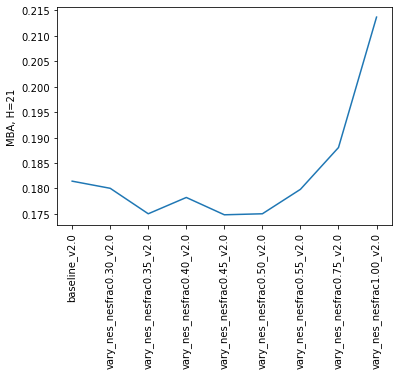

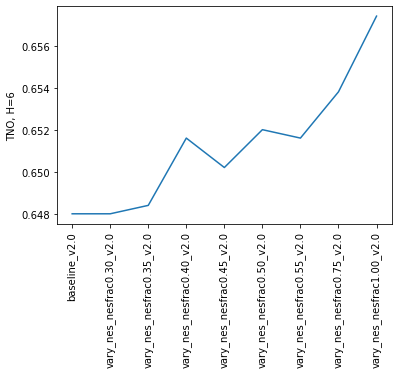

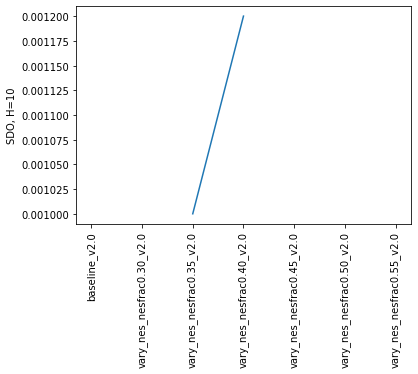

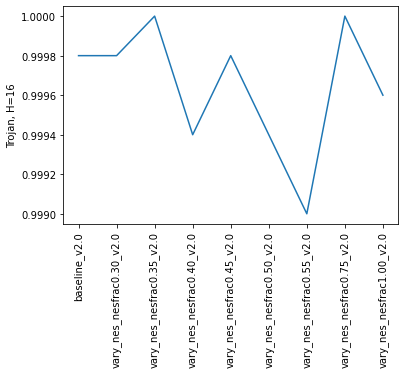

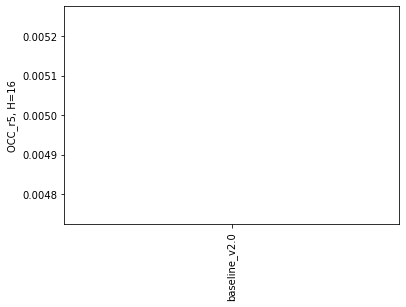

In [68]:
fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 21.000000 Discovery_N_Chances MBA 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('MBA, H=21')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 6.000000 Discovery_N_Chances TNO 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('TNO, H=6')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 10.000000 Discovery_N_Chances SDO 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('SDO, H=10')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 16.000000 Discovery_N_Chances Trojan 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Trojan, H=16')

fig, ax = plt.subplots()
ax.plot(df['DifferentialCompleteness H = 16.000000 Discovery_N_Chances OCC_r20 3 pairs in 15 nights trailing loss MoObjSlicer'][runs])
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('OCC_r5, H=16')

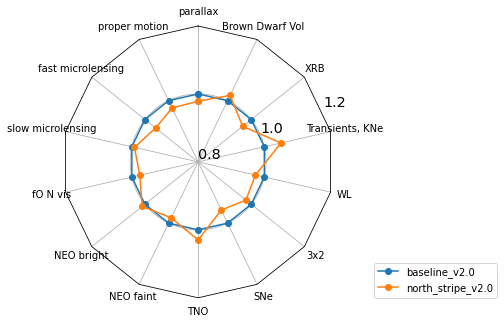

In [69]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'north' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.6, 0))
fig.savefig('north_stripe.pdf', bbox_inches="tight")

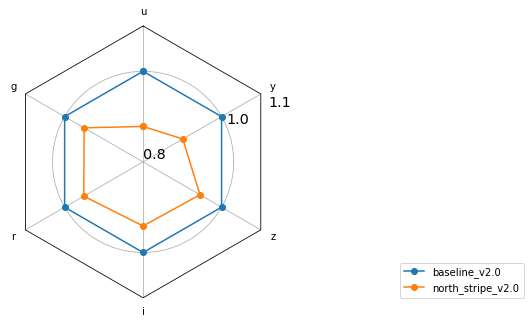

In [70]:
data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.80, 1.0, 1.1], bbox_to_anchor=(1.9, 0))
fig.savefig('north_stripe_mags.pdf', bbox_inches="tight")

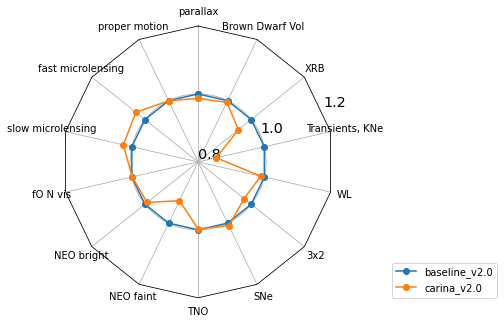

In [71]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'carina' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.6, 0))
fig.savefig('carina.pdf', bbox_inches="tight")

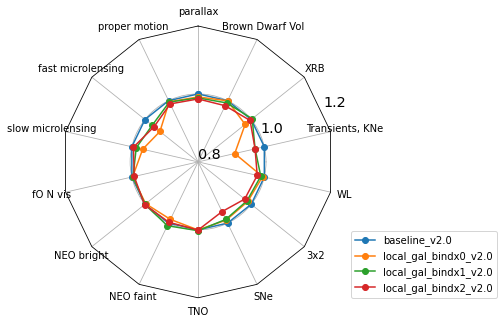

In [72]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'local' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.6, 0))
fig.savefig('local_gals.pdf', bbox_inches="tight")

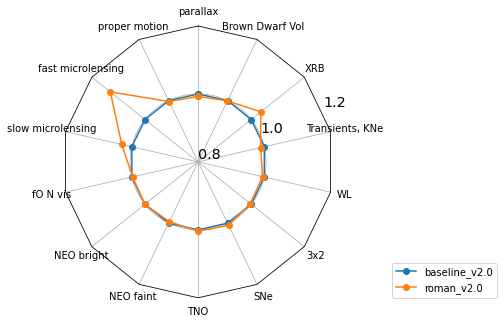

In [73]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'roman' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.6, 0))
fig.savefig('roman.pdf', bbox_inches="tight")

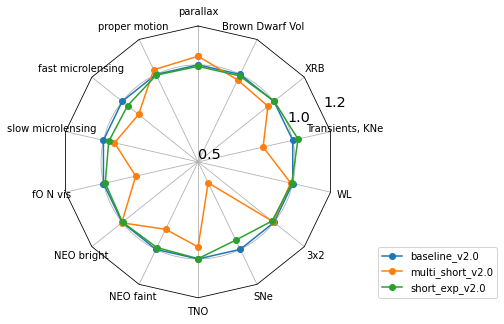

In [74]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'short' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.5, 1.0, 1.2], bbox_to_anchor=(1.6, 0))
fig.savefig('short_exp.pdf', bbox_inches="tight")

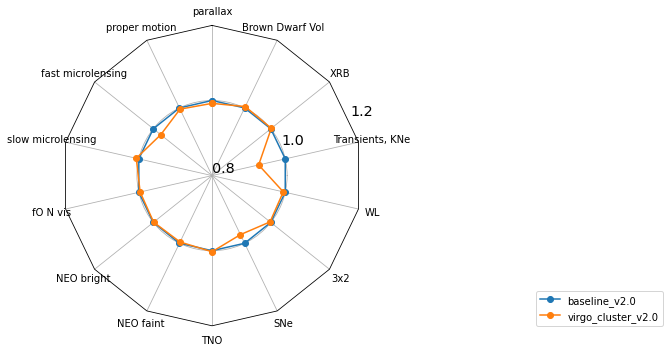

In [75]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'virgo' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

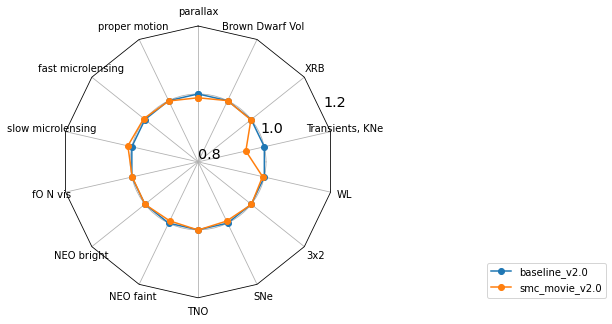

In [76]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'smc' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('smc_movie.pdf', bbox_inches="tight")

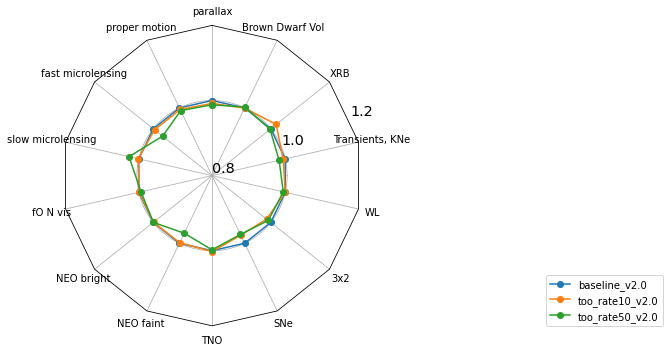

In [77]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'too' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.tight_layout()

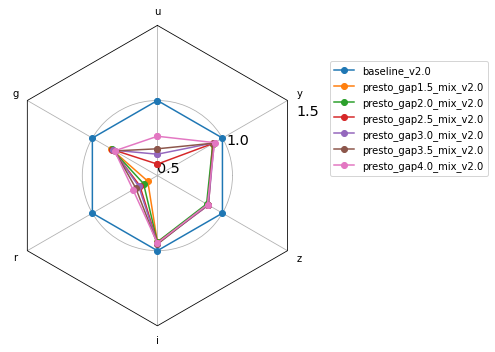

In [78]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'presto_gap' in run and 'mix' in run] 

data_normed = norm_df(mag_data, runs, ['u', 'g', 'r', 'i', 'z', 'y'], norm_run='baseline_v2.0',
                      invert_cols=None, mag_cols='all')
#data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.50, 1.0, 1.5], alpha=.1)
fig.tight_layout()

In [79]:
mag_data.loc[runs]

,u,g,r,i,z,y
baseline_v2.0,25.818916,26.733479,26.755971,26.218659,25.510379,24.762720
presto_gap1.5_mix_v2.0,25.102174,26.590934,26.330134,26.161797,25.399538,24.687339
presto_gap2.0_mix_v2.0,25.302785,26.582534,26.362610,26.160226,25.388431,24.688675
presto_gap2.5_mix_v2.0,25.395437,26.580526,26.390830,26.165516,25.403116,24.692265
presto_gap3.0_mix_v2.0,25.461368,26.572308,26.399548,26.171755,25.401906,24.699431
presto_gap3.5_mix_v2.0,25.497458,26.562218,26.422237,26.175466,25.396260,24.694561
presto_gap4.0_mix_v2.0,25.580833,26.562637,26.443690,26.167508,25.395612,24.701756


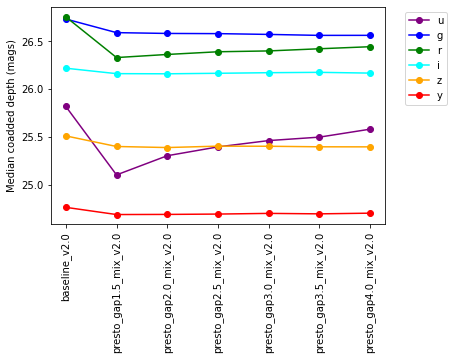

In [80]:
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}
fig, ax = plt.subplots()
for filtername in 'ugrizy':
    ax.plot(mag_data.loc[runs][filtername], label=filtername, color=f2c[filtername], marker='o')
ack = ax.tick_params('x',  rotation=90)
ax.set_ylabel('Median coadded depth (mags)')
ax.legend(bbox_to_anchor=(1.2, 1.0))

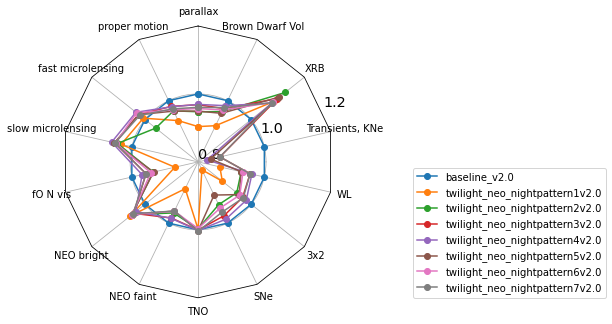

In [81]:
runs = ['baseline_v2.0'] + [run for run in df.index if 'twili' in run] 
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, norm_run='baseline_v2.0')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(2, 0))
fig.savefig('twilight.pdf', bbox_inches="tight")

In [82]:
data.loc[runs]

,parallax,proper motion,fast microlensing,slow microlensing,fO N vis,NEO bright,NEO faint,TNO,SNe,3x2,WL,"Transients, KNe",XRB,Brown Dwarf Vol
baseline_v2.0,0.791058,0.184088,0.1580,0.4284,839.0,0.9298,0.3788,0.6480,25374.969,37.908126,186.0,179.0,1620.0,168086.074111
twilight_neo_nightpattern1v2.0,0.875151,0.196896,0.1590,0.4422,730.0,0.9810,0.3362,0.6468,20953.825,33.789185,161.0,138.0,1759.0,154351.417123
twilight_neo_nightpattern2v2.0,0.834827,0.190420,0.1516,0.4470,785.0,0.9752,0.3662,0.6460,23844.679,35.845149,173.0,139.0,1827.0,162087.778424
twilight_neo_nightpattern3v2.0,0.816851,0.187588,0.1618,0.4504,803.0,0.9696,0.3724,0.6484,24760.890,36.676457,178.0,155.0,1780.0,163754.285876
twilight_neo_nightpattern4v2.0,0.816124,0.187829,0.1634,0.4545,813.0,0.9618,0.3728,0.6492,25056.156,37.191955,179.0,148.0,1745.0,165354.484623
twilight_neo_nightpattern5v2.0,0.833112,0.190596,0.1617,0.4509,784.0,0.9756,0.3638,0.6496,23049.196,36.176128,173.0,150.0,1792.0,161144.691863
twilight_neo_nightpattern6v2.0,0.826466,0.189733,0.1630,0.4494,791.0,0.9750,0.3640,0.6456,24115.741,36.272295,174.0,141.0,1751.0,162983.877983
twilight_neo_nightpattern7v2.0,0.823417,0.189163,0.1611,0.4502,803.0,0.9714,0.3638,0.6508,24451.653,36.768819,178.0,155.0,1749.0,164277.011171


In [83]:
data.loc[runs].to_latex()

'\\begin{tabular}{lrrrrrrrrrrrrrr}\n\\toprule\n{} &  parallax &  proper motion &  fast microlensing &  slow microlensing &  fO N vis &  NEO bright &  NEO faint &     TNO &        SNe &        3x2 &     WL &  Transients, KNe &     XRB &  Brown Dwarf Vol \\\\\n\\midrule\nbaseline\\_v2.0                  &  0.791058 &       0.184088 &             0.1580 &             0.4284 &     839.0 &      0.9298 &     0.3788 &  0.6480 &  25374.969 &  37.908126 &  186.0 &            179.0 &  1620.0 &    168086.074111 \\\\\ntwilight\\_neo\\_nightpattern1v2.0 &  0.875151 &       0.196896 &             0.1590 &             0.4422 &     730.0 &      0.9810 &     0.3362 &  0.6468 &  20953.825 &  33.789185 &  161.0 &            138.0 &  1759.0 &    154351.417123 \\\\\ntwilight\\_neo\\_nightpattern2v2.0 &  0.834827 &       0.190420 &             0.1516 &             0.4470 &     785.0 &      0.9752 &     0.3662 &  0.6460 &  23844.679 &  35.845149 &  173.0 &            139.0 &  1827.0 &    162087.778424 \\\\\n

In [84]:
df['DifferentialCompleteness H = 17.000000 Discovery_N_Chances Trojan 3 pairs in 15 nights trailing loss MoObjSlicer']

baseline_retrofoot_v2.0    0.5070
baseline_v2.0              0.5154
bluer_indx0_v2.0           0.4844
bluer_indx1_v2.0           0.4538
carina_v2.0                0.4864
                            ...  
shave_30_v2.1              0.5828
shave_32_v2.1              0.6200
shave_35_v2.1              0.6190
shave_38_v2.1              0.6902
shave_40_v2.1              0.7052
Name: DifferentialCompleteness H = 17.000000 Discovery_N_Chances Trojan 3 pairs in 15 nights trailing loss MoObjSlicer, Length: 266, dtype: float64

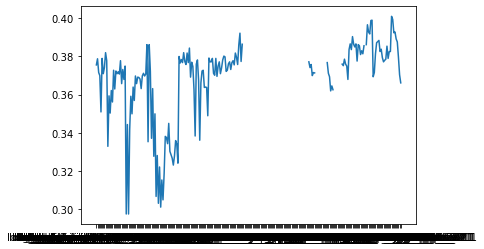

In [85]:
plt.plot(df['DifferentialCompleteness H = 22.000000 Discovery_N_Chances NEO 3 pairs in 15 nights trailing loss MoObjSlicer'])

In [86]:
# is there anything to see in the periodic star stuff?
[name for name in df.columns if 'Modula' in name]

['Mean PeriodicStarModulationMetric dm 18 interval 15 RRc HealpixSlicer',
 'Median PeriodicStarModulationMetric dm 18 interval 15 RRc HealpixSlicer',
 'Max PeriodicStarModulationMetric dm 18 interval 15 RRc HealpixSlicer',
 'Mean PeriodicStarModulationMetric dm 19 interval 15 RRc HealpixSlicer',
 'Median PeriodicStarModulationMetric dm 19 interval 15 RRc HealpixSlicer',
 'Max PeriodicStarModulationMetric dm 19 interval 15 RRc HealpixSlicer',
 'Mean PeriodicStarModulationMetric dm 20 interval 15 RRc HealpixSlicer',
 'Median PeriodicStarModulationMetric dm 20 interval 15 RRc HealpixSlicer',
 'Max PeriodicStarModulationMetric dm 20 interval 15 RRc HealpixSlicer',
 'Mean PeriodicStarModulationMetric dm 21 interval 15 RRc HealpixSlicer',
 'Median PeriodicStarModulationMetric dm 21 interval 15 RRc HealpixSlicer',
 'Max PeriodicStarModulationMetric dm 21 interval 15 RRc HealpixSlicer',
 'Mean PeriodicStarModulationMetric dm 18 interval 30 RRc HealpixSlicer',
 'Median PeriodicStarModulationMet

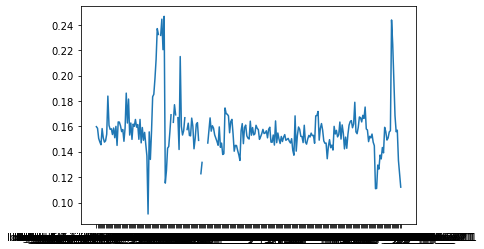

In [87]:
plt.plot(df['Median PeriodicStarModulationMetric dm 18 interval 15 RRc HealpixSlicer'])

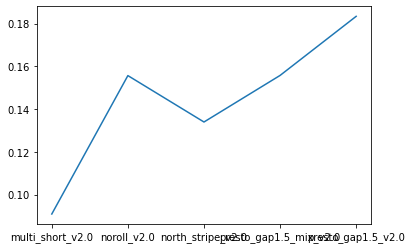

In [88]:
plt.plot(df['Median PeriodicStarModulationMetric dm 18 interval 15 RRc HealpixSlicer'][45:50])

In [89]:
df.index[45:50]

Index(['multi_short_v2.0', 'noroll_v2.0', 'north_stripe_v2.0',
       'presto_gap1.5_mix_v2.0', 'presto_gap1.5_v2.0'],
      dtype='object')

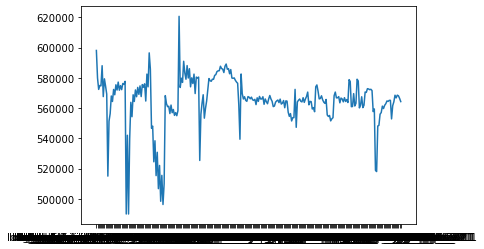

In [90]:
plt.plot(df['VolumeSum Brown Dwarf, L4  HealpixSlicer'])

In [91]:
df.index[np.where(df['VolumeSum Brown Dwarf, L4  HealpixSlicer'] < 540000)]

Index(['long_gaps_nightsoff0_delayed-1_v2.0',
       'long_gaps_np_nightsoff0_delayed-1_v2.0',
       'long_gaps_np_nightsoff0_v2.0', 'presto_gap2.0_mix_v2.0',
       'presto_gap2.0_v2.0', 'presto_gap2.5_mix_v2.0', 'presto_gap2.5_v2.0',
       'presto_gap3.0_mix_v2.0', 'presto_gap3.0_v2.0',
       'presto_gap3.5_mix_v2.0', 'presto_gap3.5_v2.0',
       'presto_gap4.0_mix_v2.0', 'presto_gap4.0_v2.0',
       'twilight_neo_nightpattern1v2.0', 'vary_nes_nesfrac1.00_v2.0',
       'plane_priority_priority0.1_pbf_v2.1',
       'plane_priority_priority0.1_pbt_v2.1'],
      dtype='object')